In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     
from sklearn.metrics import root_mean_squared_error

In [48]:
df = pd.read_csv('../demandForecasting/train_0irEZ2H.csv')

In [49]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [51]:
df.head()


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [52]:
df.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [53]:
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [54]:
df[['month', 'day','year']] = df['week'].str.split('/', expand=True)

In [55]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,day,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [56]:
df = df.drop(columns=['week'],axis=1)

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split   

<Axes: >

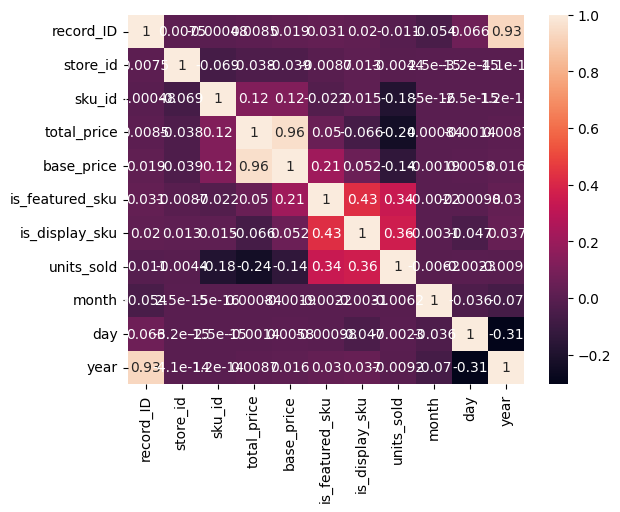

In [58]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [59]:
x , y = df.drop('units_sold',axis=1), df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [60]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [61]:

model.score(X_test, y_test)

0.7695191428397682

In [62]:

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

28.264106387904075

In [63]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

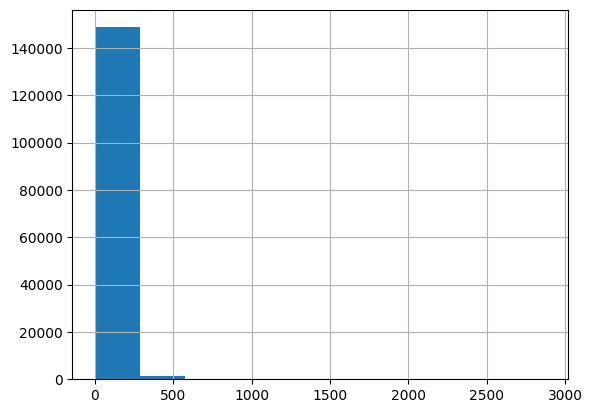

In [64]:
df.units_sold.hist()

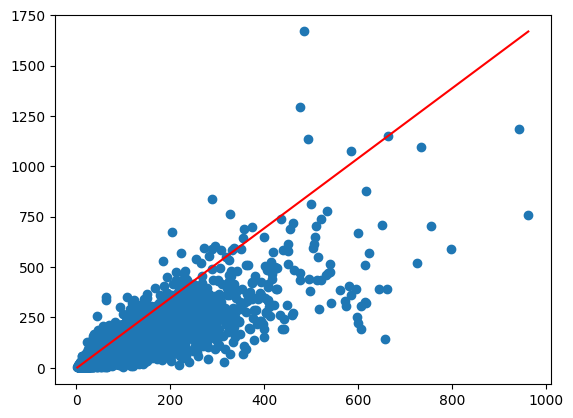

In [78]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()),np.linspace(y_test.min(), y_test.max()),color='red')


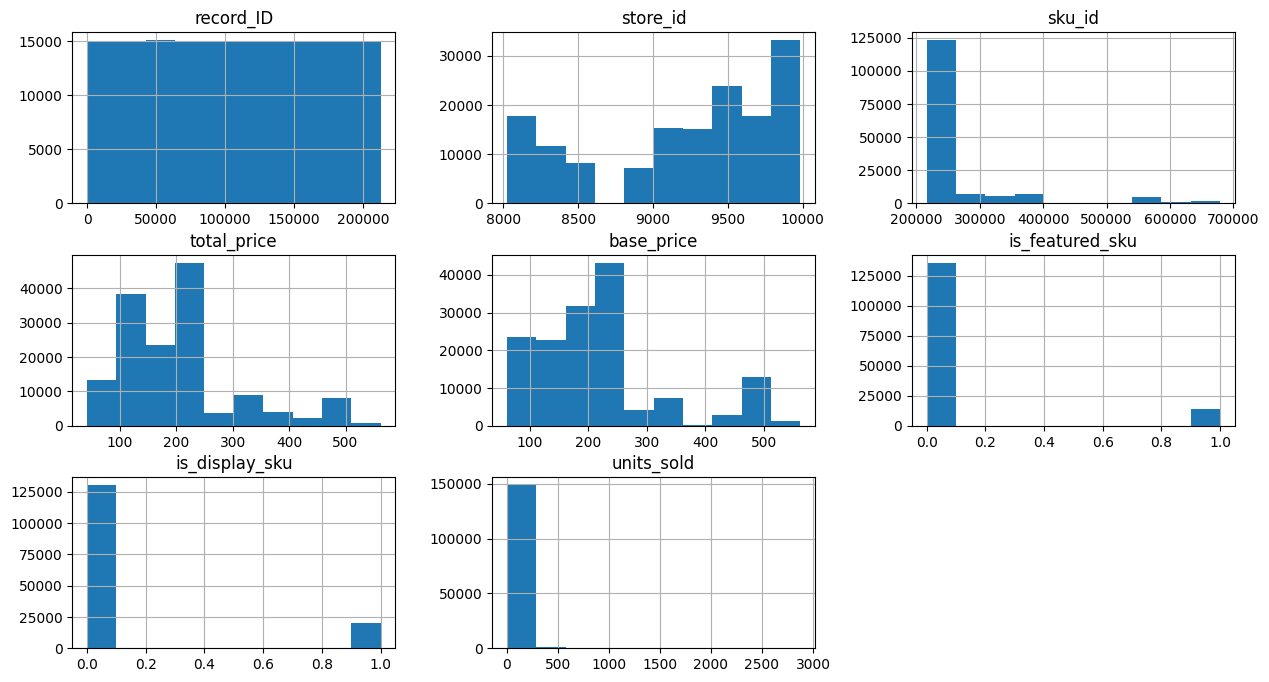

In [80]:
df.hist(figsize=(15,8))
plt.show()

In [85]:
df.drop('store_id',axis=1)

,record_ID,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,day,year
0,1,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,212638,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,547934,141.7875,191.6625,0,1,12,09,07,13


In [86]:
len(df.store_id.unique())

76

In [87]:
len(df.sku_id.unique())

28

In [91]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]

<Axes: >

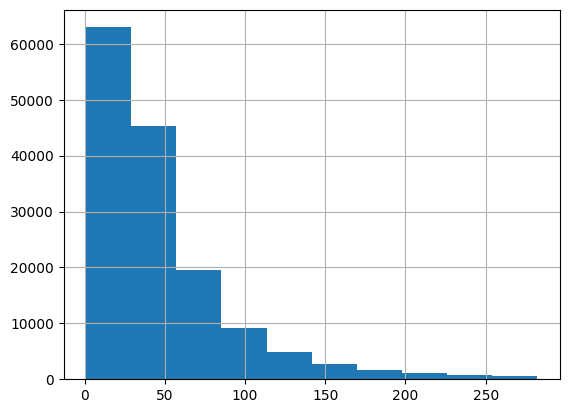

In [92]:
df.units_sold.hist()

In [95]:

pd.get_dummies(df.sku_id, prefix='item').drop('sku_id', axis=1)

KeyError: "['sku_id'] not found in axis"

In [97]:
model = RandomForestRegressor(n_jobs=-1)
x,y = df.drop('units_sold',axis=1), df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [98]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [99]:
model.score(X_test, y_test)

0.8080605148580642

In [101]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

18.895342973259286

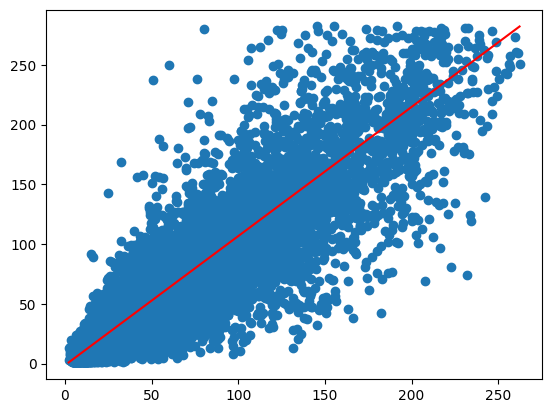

In [102]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()),np.linspace(y_test.min(), y_test.max()),color='red')


In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 20],
              'min_samples_split': [2, 3]}

model = RandomForestRegressor(n_jobs=-1)
GridSearc = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=3)
GridSearc.fit(x, y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=3)

In [106]:
best_model = GridSearc.best_estimator_

In [107]:
GridSearc.best_params_

{'min_samples_split': 3, 'n_estimators': 20}

In [108]:
best_model.score(X_test, y_test)

0.9655573748672783